# Cleaning, inspecting JSON tracking output

## Goals
- Tracking program outputs JSON files with tracking and tag data
- Need to experiment with cleaning and processing it before integrating it back into the main program

In [13]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 28 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Fri Aug 04 09:31:26 2017 AEST

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import pandas as pd

import os
import sys

sys.path.append("../src")

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [15]:
def read_coordinates_file(coord_file_path):
    file_extension = coord_file_path.split('.')[-1]
    if file_extension == 'csv':
        df = pd.read_csv(coord_file_path)
    elif file_extension == 'json':
        df = pd.read_json(coord_file_path)
    else:
        print('Unknown coordinate file type')
        sys.exit(0)
        
    # turn coordinate column into x,y dictionary
    df['xy'] = df['xy'].apply(lambda x: eval(str(x)))

    return df

In [165]:
df = read_coordinates_file('/home/jack/Data/Caffeine_Unique_Tags/json/2017-02-14_23-32-00.json')
df = df.sort_values('frame_nums', ascending=True)
df.head(n=10)

,bee_id,classifications,flattened_28x28_tag_matrices,frame_nums,xy
0,0,47,"[29, 31, 33, 35, 36, 36, 36, 43, 48, 51, 56, 6...",0,"{u'y': 1317.45056152, u'x': 1767.85913086}"
25950,2,56,"[4, 11, 16, 17, 19, 21, 26, 28, 31, 31, 36, 36...",0,"{u'y': 975.152160644, u'x': 1351.9621582}"
31893,3,54,"[14, 14, 14, 17, 24, 29, 33, 40, 45, 49, 54, 5...",0,"{u'y': 830.224731445, u'x': 1563.7980957}"
13501,1,48,"[25, 25, 23, 24, 29, 30, 34, 38, 45, 41, 33, 3...",0,"{u'y': 1026.18273926, u'x': 1672.51904297}"
1,0,38,"[26, 26, 26, 26, 27, 27, 30, 36, 36, 36, 46, 6...",1,"{u'y': 1314.23205566, u'x': 1770.20056152}"
25951,2,56,"[23, 27, 27, 30, 31, 33, 33, 32, 32, 31, 30, 3...",1,"{u'y': 972.267761231, u'x': 1351.22009277}"
31894,3,54,"[29, 29, 26, 24, 19, 25, 32, 38, 40, 47, 49, 4...",1,"{u'y': 828.093566894, u'x': 1562.76062012}"
13502,1,48,"[28, 26, 26, 26, 25, 24, 23, 24, 28, 28, 26, 2...",1,"{u'y': 1023.3392334, u'x': 1673.25805664}"
13503,1,48,"[34, 33, 31, 32, 36, 37, 38, 41, 43, 46, 51, 5...",2,"{u'y': 1024.11804199, u'x': 1673.04772949}"
25952,2,56,"[12, 14, 14, 15, 17, 19, 23, 29, 31, 31, 31, 3...",2,"{u'y': 972.648376465, u'x': 1350.78503418}"


In [99]:
print(df['xy'][0]['x'])
print(type(df['xy'][0]['x']))

1767.85913086
<type 'float'>


In [100]:
flat_image = df['flattened_28x28_tag_matrices'][0]

print(flat_image)
print(len(flat_image))

[29, 31, 33, 35, 36, 36, 36, 43, 48, 51, 56, 68, 73, 66, 61, 53, 50, 44, 42, 44, 44, 45, 45, 46, 43, 38, 36, 36, 28, 30, 32, 37, 42, 45, 50, 58, 66, 70, 84, 97, 113, 109, 104, 100, 87, 78, 67, 62, 60, 54, 51, 47, 44, 41, 38, 36, 26, 31, 33, 36, 45, 52, 61, 68, 79, 89, 110, 131, 151, 150, 144, 146, 128, 109, 94, 83, 73, 62, 57, 51, 46, 43, 39, 34, 26, 33, 36, 33, 49, 58, 72, 85, 95, 110, 134, 162, 185, 188, 188, 189, 166, 139, 121, 103, 87, 72, 59, 58, 52, 43, 39, 33, 26, 34, 37, 44, 68, 94, 118, 121, 123, 125, 150, 171, 194, 200, 205, 212, 198, 181, 165, 149, 128, 110, 100, 80, 65, 54, 49, 42, 24, 33, 42, 52, 90, 128, 166, 162, 156, 148, 169, 186, 203, 216, 225, 233, 228, 217, 212, 193, 171, 151, 129, 102, 78, 71, 64, 57, 23, 36, 49, 64, 109, 163, 212, 198, 185, 169, 184, 195, 213, 227, 233, 239, 239, 240, 240, 234, 215, 194, 164, 125, 93, 81, 73, 66, 33, 47, 66, 82, 128, 172, 214, 195, 177, 158, 169, 178, 191, 210, 231, 241, 241, 241, 241, 235, 227, 215, 191, 166, 140, 115, 99, 76, 37

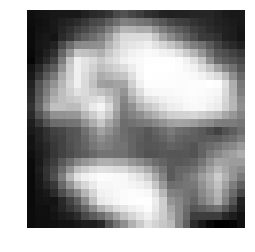

In [101]:
view(np.array(flat_image, dtype=np.uint8).reshape(28, 28))

In [102]:
import uuid

In [ ]:
{
    'bee_uuid': 5,
    'classification': 21,
    'path_frame_nums': [{'start':,'end'}]
    'xy_path': [[{'x':,'y'}], [{'x':,'y'}]]
}

def create_new_bee_paths(classification, start_end_frame_num_paths, xy_paths):
    bee_paths_data = {'video_start_datetime': x , 'bee_uuid': uuid.uuid4().hex, 'classification': classification, 'start_end_frame_num_paths': start_end_frame_num_paths, 'xy_paths': xy_paths}
    

In [1301]:
grouped_bee_id = df.groupby('bee_id')
first_bee_df = grouped_bee_id.get_group(0)
first_bee_df.head()

,bee_id,classifications,flattened_28x28_tag_matrices,frame_nums,xy
0,0,47,"[29, 31, 33, 35, 36, 36, 36, 43, 48, 51, 56, 6...",0,"{u'y': 1317.45056152, u'x': 1767.85913086}"
1,0,38,"[26, 26, 26, 26, 27, 27, 30, 36, 36, 36, 46, 6...",1,"{u'y': 1314.23205566, u'x': 1770.20056152}"
2,0,38,"[26, 26, 26, 31, 29, 26, 27, 27, 33, 40, 52, 6...",2,"{u'y': 1314.06726074, u'x': 1772.17089844}"
3,0,38,"[19, 20, 22, 25, 25, 28, 35, 39, 45, 50, 52, 5...",3,"{u'y': 1311.36315918, u'x': 1774.7980957}"
4,0,38,"[19, 22, 23, 23, 25, 30, 36, 39, 44, 47, 60, 6...",4,"{u'y': 1314.21838379, u'x': 1776.66015625}"


In [1317]:
UNKNOWN_CLASS = 3
MIXED_CLASS = 'mixed'
GAP_CLASS = 'gap'
MAX_FRAME_GAP_BETWEEN_PATHS = 10
NUM_GROUP_CLASSIFICATIONS = 40
MIN_NUM_CLASSIFIED_GROUP = 10
NUM_GROUPS_IN_SECTION = 5
CLASS_CONF_THRESH = 0.6

def increment_dict_key_value(class_dict, classification):
    if classification in class_dict.keys():
        class_dict[classification] += 1
    else:
        class_dict[classification] = 1
    return class_dict

def get_most_freq_class_pred(section_classifications):
    num_classifications = len(section_classifications)
    num_mixed = section_classifications.count(MIXED_CLASS)
    num_unknown = section_classifications.count(UNKNOWN_CLASS)
    num_mixed_unknown = num_mixed + num_unknown
    num_known = num_classifications - num_mixed_unknown
    
    if num_classifications < 2:
        return UNKNOWN_CLASS
    elif num_mixed > 1:
        return MIXED_CLASS
    elif num_mixed_unknown > 2:
        return UNKNOWN_CLASS
    elif num_known <= num_mixed_unknown:
        return UNKNOWN_CLASS
    else:
        section_count_dict = {MIXED_CLASS: 0, UNKNOWN_CLASS: 0}
        for classification in section_classifications:
            section_count_dict = increment_dict_key_value(section_count_dict, classification)
        
        del section_count_dict[MIXED_CLASS]
        del section_count_dict[UNKNOWN_CLASS]
        
        percent_section_count_dict = {c: float(section_count_dict[c]) / num_known for c in section_count_dict}
        most_freq_class_pred = max(section_count_dict, key=section_count_dict.get)
        
        if percent_section_count_dict[most_freq_class_pred] > 0.5:
            return most_freq_class_pred
        else:
            return MIXED_CLASS

class BeeData:
    def __init__(self, classification):
        self.start_end_frame_num_all_paths = []
        self.list_of_all_xy_paths = []
        
        self.consensus_grouped_classifications = []
        self.num_classifications_in_group = 0
        
        self.class_counts_path = {UNKNOWN_CLASS: 0, GAP_CLASS: 0}
        self.add_classification(classification)
        
    def add_classification(self, classification):
        self.num_classifications_in_group += 1
        self.class_counts_path = increment_dict_key_value(self.class_counts_path, classification)
            
        if self.num_classifications_in_group == NUM_GROUP_CLASSIFICATIONS:
            self.identify_freq_class_path_group()
            self.num_classifications_in_group = 0
    
    def identify_freq_class_path_group(self):
        num_unknown_gaps_classified = self.class_counts_path[UNKNOWN_CLASS] + self.class_counts_path[GAP_CLASS]
        num_remaining_classified = self.num_classifications_in_group - num_unknown_gaps_classified
        if self.num_classifications_in_group < MIN_NUM_CLASSIFIED_GROUP or num_remaining_classified < MIN_NUM_CLASSIFIED_GROUP:
            self.consensus_grouped_classifications.append(UNKNOWN_CLASS)
        else:
            del self.class_counts_path[UNKNOWN_CLASS]
            del self.class_counts_path[GAP_CLASS]
            percent_class_counts_path = {c: float(self.class_counts_path[c]) / num_remaining_classified for c in self.class_counts_path}
            most_freq_class_pred = max(percent_class_counts_path, key=percent_class_counts_path.get)
            if percent_class_counts_path[most_freq_class_pred] > CLASS_CONF_THRESH:
                self.consensus_grouped_classifications.append(most_freq_class_pred)
            else:
                self.consensus_grouped_classifications.append(MIXED_CLASS)
        
        self.current_group_tags = []
        self.class_counts_path = {UNKNOWN_CLASS: 0, GAP_CLASS: 0}
        
    def identify_uncertain_region(self, list_classifications):
        is_uncertain_region = False
        num_mixed = list_classifications.count(MIXED_CLASS)
        num_unknown = list_classifications.count(UNKNOWN_CLASS)
        if num_mixed > 1 or num_unknown > 3 or num_mixed + num_unknown > 3:
            is_uncertain_region = True
        return is_uncertain_region
    
    
    def get_index_prev_class(self, current_path_index, current_section_pred, classifications_list):
        while True:
            if current_section_pred != classifications_list[current_path_index]:
                return current_path_index
            else:
                current_path_index -= 1
                
        
                
        NUM_GROUP_CLASSIFICATIONS
        
    
    def merge_group_classifications_into_sections(self):
        num_grouped_classifications = len(self.consensus_grouped_classifications)
        num_concurrent_mixed = 0
        num_concurrent_unknown = 0
        is_unknown_path_section = False
        class_path_end_index = []
        classes_in_path = []
        prev_classification = None
        
        for i in range(0, num_grouped_classifications, NUM_GROUPS_IN_SECTION):
            current_section = self.consensus_grouped_classifications[i:i+NUM_GROUPS_IN_SECTION]
            current_section_pred = get_most_freq_class_pred(current_section)
            
            #print(current_section, current_section_pred)
                
            if current_section_pred == MIXED_CLASS:
                num_concurrent_mixed += 1
            elif current_section_pred == UNKNOWN_CLASS:
                num_concurrent_unknown += 1
            else:
                num_concurrent_mixed_unknown = num_concurrent_mixed + num_concurrent_unknown
                current_prev_pred_same = current_section_pred == prev_classification
                
                if current_prev_pred_same:
                    if num_concurrent_mixed > 2 or num_concurrent_mixed_unknown > 6:
                        is_unknown_path_section = True
                else:
                    if num_concurrent_mixed > 1 or num_concurrent_mixed_unknown > 3:
                        is_unknown_path_section = True
                        
                #print(is_unknown_path_section)
                
                if is_unknown_path_section and prev_classification is None:
                    prev_classification = UNKNOWN_CLASS
                
                if prev_classification is None:
                    prev_classification = current_section_pred
                    current_prev_pred_same = True
                
                if not current_prev_pred_same or is_unknown_path_section:
                    # covers case where there's gap or new class
                    prev_class_index = self.get_index_prev_class(i,  current_section_pred, self.consensus_grouped_classifications)
                    class_path_end_index.append(prev_class_index)
                    if is_unknown_path_section:
                        classes_in_path.append(UNKNOWN_CLASS)
                    else:
                        classes_in_path.append(prev_classification)
                
                prev_classification = current_section_pred
                num_concurrent_mixed = 0
                num_concurrent_unknown = 0
                is_unknown_path_section = False
        
        
        num_concurrent_mixed_unknown = num_concurrent_mixed + num_concurrent_unknown
        if prev_classification is None:
            classes_in_path.append(UNKNOWN_CLASS)
            class_path_end_index.append(num_grouped_classifications-1)
        elif num_concurrent_mixed_unknown == 0 or num_concurrent_mixed < 3 and num_concurrent_mixed_unknown < 7:
            classes_in_path.append(prev_classification)
            class_path_end_index.append(num_grouped_classifications-1)
        else:
            final_section = self.consensus_grouped_classifications[num_grouped_classifications-(num_concurrent_mixed_unknown*NUM_GROUPS_IN_SECTION):num_grouped_classifications]
            current_section_pred = get_most_freq_class_pred(final_section)
            prev_class_index = self.get_index_prev_class(num_grouped_classifications-1,  current_section_pred, self.consensus_grouped_classifications)
            
            class_path_end_index.append(prev_class_index)
            classes_in_path.append(prev_classification)
            
            class_path_end_index.append(num_grouped_classifications-1)
            classes_in_path.append(UNKNOWN_CLASS)
            
        return (classes_in_path, class_path_end_index)

In [1318]:
class ProcessPaths:

    def __init__(self, video_start_datetime):
        self.video_start_datetime = video_start_datetime

    def gen_gap_coords(self, current_xy_coord, prev_xy_coord, difference_prev_frame):
        x1, y1 = current_xy_coord['x'], current_xy_coord['y']
        x2, y2 = prev_xy_coord['x'], prev_xy_coord['y']
        x_diff_per_frame = (x2 - x1) / float(difference_prev_frame)
        y_diff_per_frame = (y2 - y1) / float(difference_prev_frame)

        gap_coords = []
        for gap in range(1, difference_prev_frame + 1):
            x_gap_coord = x2 - x_diff_per_frame * gap
            y_gap_coord = y2 - y_diff_per_frame * gap
            gap_coords.append({'x': x_gap_coord, 'y': y_gap_coord})

        return gap_coords

    def process_paths(self, bee_df):
        xy_list = bee_df['xy'].tolist()
        frame_nums_list = bee_df['frame_nums'].tolist()
        classifications_list = bee_df['classifications'].tolist()
        flat_tags = bee_df['flattened_28x28_tag_matrices'].tolist()

        bee_data = BeeData(classifications_list[0])
        start_end_frame_num_path = {'start': frame_nums_list[0],'end': frame_nums_list[0]}
        xy_path = [xy_list[0]]
        
        c = []
        c.append(classifications_list[0])
        
        coord_counter = 1
        
        num_coords = len(xy_list)
        for i in range(1, num_coords):
            
            
            difference_prev_frame = frame_nums_list[i] - start_end_frame_num_path['end']

            if difference_prev_frame == 1:
                start_end_frame_num_path['end'] = frame_nums_list[i]
                xy_path.append(xy_list[i])
                bee_data.add_classification(classifications_list[i])
                
                c.append(classifications_list[i])
                coord_counter += 1
                
            elif difference_prev_frame < MAX_FRAME_GAP_BETWEEN_PATHS:
                start_end_frame_num_path['end'] = frame_nums_list[i]
                generated_coord_gaps = gen_gap_coords(xy_list[i], xy_list[i-1], difference_prev_frame)
                fill_path_classifications_gap = ['gap'] * len(generated_coord_gaps)
                fill_path_classifications_gap[-1] = classifications_list[i]
                xy_path.extend(generated_coord_gaps)
        
                for gap_classification in fill_path_classifications_gap:
                    bee_data.add_classification(gap_classification)
                    
                    c.append(classifications_list[i])
                    coord_counter += 1
            else:
                bee_data.list_of_all_xy_paths.append(xy_path)
                bee_data.start_end_frame_num_all_paths.append(start_end_frame_num_path)
                xy_path = [xy_list[i]]
                start_end_frame_num_path = {'start': frame_nums_list[i], 'end': frame_nums_list[i]}
                bee_data.add_classification(classifications_list[i])
                
                c.append(classifications_list[i])
                coord_counter += 1

        if len(xy_path) > 0:
            bee_data.list_of_all_xy_paths.append(xy_path)
            bee_data.start_end_frame_num_all_paths.append(start_end_frame_num_path)
            bee_data.identify_freq_class_path_group()

        num_coords = 0
        for xy_path in bee_data.list_of_all_xy_paths:
            for xy in xy_path:
                #print(num_coords)
                num_coords += 1
        
        print(num_coords)
        print(coord_counter)
        print(len(c))

        return bee_data

In [1319]:
pp = ProcessPaths('2017-02-14_23-32-00')
bd = pp.process_paths(first_bee_df)

13870
13870
13870


In [1320]:
mg = bd.merge_group_classifications_into_sections()
print(mg)

([38], [346])


## Test section classifications

In [1321]:
test_descriptions = [
    'first 2 sections are mixed, then its 5 after',
    'first 1 section is mixed, then its 5 after',
    '1 unknown value',
    '10 unknown values',
    '2 values, unknown and 5',
    '2 values: both 5',
    '2 values: 5 and 4',
    '1 value: 5',
    'mixed known values then 5',
    'mixed values, then 8, then 5',
    '2 sections of 5, then unknown ending',
    '5 then 4 then 5',
]

tests = [
    [MIXED_CLASS, MIXED_CLASS, 5, 5, 5, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, 5, 5, 5, 5, 5, 5, 5, UNKNOWN_CLASS, UNKNOWN_CLASS, 5, 5, 5, 5],
    [UNKNOWN_CLASS, UNKNOWN_CLASS, UNKNOWN_CLASS, UNKNOWN_CLASS, UNKNOWN_CLASS, 5, 5, 5, 5, 5, 5, 5, UNKNOWN_CLASS, UNKNOWN_CLASS, 5, 5, 5, 5],
    [UNKNOWN_CLASS],
    [UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS],
    [UNKNOWN_CLASS, 5],
    [5, 5],
    [5, 4],
    [5],
    [5,5,4,7,7,8,8,1,1,5,5,5,5,5,5],
    [5,5,4,7,7,8,8,UNKNOWN_CLASS,UNKNOWN_CLASS,5,5,5,5,5,5],
    [5,5,5,5,5,5,5,5,5,5,MIXED_CLASS, MIXED_CLASS,MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS],
    [5,4,4,5,5,4,4,4,4,5,5,5,5,5,5,5],
]

#test_descriptions = [['5 then 4 then 5'], '2 sections of 5, then unknown ending',]
#tests = [[5,4,4,5,5,4,4,4,4,5,5,5,5,5,5,5], [5,5,5,5,5,5,5,5,5,5,5, MIXED_CLASS,MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS, MIXED_CLASS],]

In [1322]:
for i in range(len(tests)):
    bd.consensus_grouped_classifications = tests[i]
    #print(test_descriptions[i], len(tests[i]))
    mg = bd.merge_group_classifications_into_sections()
    print(mg)
    #print('')

([3, 5], [7, 20])
([5], [17])
([3], [0])
([3], [9])
([3], [1])
([5], [1])
([3], [1])
([3], [0])
([3, 5], [8, 14])
([8, 5], [8, 14])
([5, 3], [9, 24])
([5, 4, 5], [4, 8, 15])


In [1276]:
xx = [
    [UNKNOWN_CLASS, UNKNOWN_CLASS, 5, 5, 5],
    [UNKNOWN_CLASS, MIXED_CLASS, 5, 5, 5],
    [MIXED_CLASS, MIXED_CLASS, 5, 5, 5],
    [MIXED_CLASS,UNKNOWN_CLASS,UNKNOWN_CLASS,1,1],
    [1,2,3,4,5],
    [1,1,2,2,UNKNOWN_CLASS],
    [UNKNOWN_CLASS,UNKNOWN_CLASS,4,5,6],
    [1,1,2,2,7],
    [1,1,1,2,7],
    [1,1,1,2,2],
    [1,1,1,1], # too few
    [1,1,1], # too few
    [1,1],
    [1],
    [1,2],
    [UNKNOWN_CLASS, UNKNOWN_CLASS, 1]
]

for x in xx:
    print(get_most_freq_class_pred(x))

5
5
mixed
3
mixed
mixed
mixed
mixed
1
1
1
1
1
3
mixed
3


In [ ]:
print(set(x1))
print(set(x2))
print(set(x3))
print(set(x4))
print(set(x5))
print(set(x6))